In [40]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import dlib
import os.path

In [29]:
class Align:
    def __init__(self, predictor_path):
        self.detector = dlib.get_frontal_face_detector()
        self.sp = dlib.shape_predictor(predictor_path)

    def align(self, rgbImg, imgDim=224):
        dets = self.detector(rgbImg, 1) 
        if len(dets) == 0:
            return

        faces = dlib.full_object_detections()
        for detection in dets:
            faces.append(self.sp(rgbImg, detection))

        images = dlib.get_face_chips(rgbImg, faces, size=imgDim)
        return images

In [34]:
def load_img(path):
    img = cv2.imread(path, 1)
    img = img[..., ::-1]
    return img

In [36]:
def align_img(rgbImg, imgDim=96, pred_path='shape_predictor_5_face_landmarks.dat'):
    return Align(pred_path).align(rgbImg, imgDim)

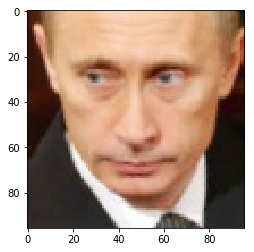

In [39]:
img = load_img('../images/Vladimir_Putin/Vladimir_Putin_0004.jpg')
align_faces = align_img(img)
plt.imshow(align_faces[0])

In [42]:
class IdentityData():
    def __init__(self, folder, name, file):
        self.folder = folder
        self.name = name
        self.file = file
        
    def image_path(self):
        return os.path.join(self.folder, self.name, self.file)
    
    def __repr__(self):
        return self.image_path()
    
def load_data(path):
    data = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                data.append(IdentityData(path, i, f))
                
    return np.array(data)

photos = load_data('../images/')
        

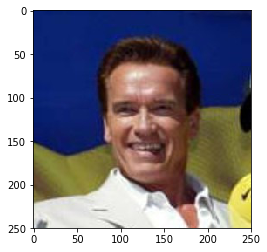

In [49]:
plt.imshow(load_img(photos[51].image_path()))

In [54]:
from model import create_model

nn4 = create_model()
nn4.load_weights('./weights/nn4.small2.v1.h5')

OSError: Unable to open file (unable to open file: name = '/weights/nn4.small2.v1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [53]:
!pwd

/Users/yra/Desktop/study/python/face_paper/FaceNet
